# Bank Fraud Detection

## Exploring the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("fraud_dataset_example.csv")
raw_data = raw_data.drop(columns=["isFlaggedFraud"]) # Drops isFlaggedFraud column

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


In [4]:
raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


In [5]:
num_df = raw_data.select_dtypes(include=["number"]).copy() # Only numeric columns

In [6]:
num_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.076010,0.004918,0.004737,0.009535,0.011181,-0.051498
amount,0.076010,1.000000,-0.010663,-0.016614,0.244933,0.372792,0.036008
oldbalanceOrg,0.004918,-0.010663,1.000000,0.998963,0.103087,0.072234,-0.004235
newbalanceOrig,0.004737,-0.016614,0.998963,1.000000,0.104622,0.071242,-0.010546
oldbalanceDest,0.009535,0.244933,0.103087,0.104622,1.000000,0.938971,-0.009208
newbalanceDest,0.011181,0.372792,0.072234,0.071242,0.938971,1.000000,-0.006353
isFraud,-0.051498,0.036008,-0.004235,-0.010546,-0.009208,-0.006353,1.000000


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>]], dtype=object)

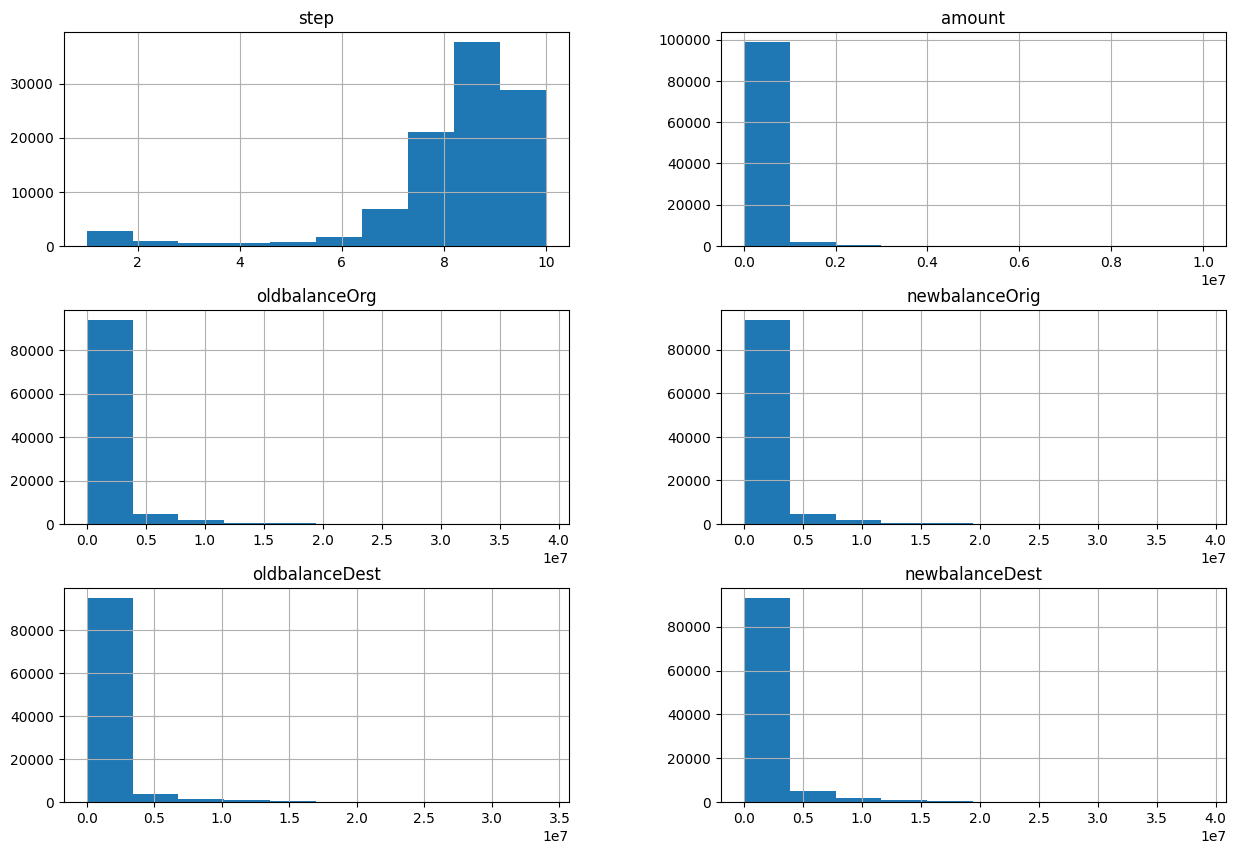

In [7]:
num_df.drop(columns=["isFraud"]).select_dtypes(include=["number"]).hist(figsize=(15, 10)) # 

In [8]:
raw_data["step"].value_counts().sort_index()

step
1      2708
2      1014
3       552
4       565
5       665
6      1660
7      6837
8     21097
9     37628
10    28887
Name: count, dtype: int64

In [9]:
raw_data["type"].value_counts()

type
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

## Preparing the Data

In [10]:
X = raw_data.drop(columns=["isFraud"])
y = raw_data["isFraud"]

In [11]:
cnt = np.bincount(y)
print("0s:", cnt[0])
print("1s:", cnt[1])

0s: 101497
1s: 116


### Over-Sampling the Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y) # train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train) # train-validation split

In [13]:
y_train_cnt = np.bincount(y_train)
print(y_train_cnt[1] / (y_train_cnt[0] + y_train_cnt[1]))

0.0011379013408783368


In [14]:
y_test_cnt = np.bincount(y_test)
print(y_test_cnt[1] / (y_test_cnt[0] + y_test_cnt[1]))

0.0011317226787383753


In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [16]:
cnt_os = np.bincount(y_train)
print("0s:", cnt_os[0])
print("1s:", cnt_os[1])

0s: 64958
1s: 64958


In [17]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,9,CASH_OUT,213281.64,C398780249,13704.05,0.00,C1508518454,251295.48,474672.19
1,10,PAYMENT,16472.88,C352036771,1470687.95,1454215.07,M865250577,0.00,0.00
2,8,PAYMENT,19641.81,C1624989017,1014856.29,995214.48,M1957895581,0.00,0.00
3,9,CASH_IN,273488.88,C1890325322,3935517.33,4209006.22,C795982694,1747780.68,4158805.98
4,8,CASH_OUT,107365.70,C1658345113,0.00,0.00,C1997859171,235783.95,300656.87
...,...,...,...,...,...,...,...,...,...
129911,7,TRANSFER,164.00,C1455969984,164.00,0.00,C2119910556,0.00,0.00
129912,4,TRANSFER,86070.17,C1844941220,86070.17,0.00,C1191544932,0.00,0.00
129913,10,TRANSFER,93810.76,C481501970,93810.76,0.00,C1262577882,0.00,0.00
129914,6,CASH_OUT,216422.00,C1547714604,216422.00,0.00,C7881234,10097.00,48630.50


### Encoding and Scaling the Data

In [18]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelBinarizer



Notice that the `X_train` data is used to fit each function so that the encoders/scalers will not fit the validation and testing data:  

In [19]:
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

oe = OrdinalEncoder(categories=[[1,2,3,4,5,6,7,8,9,10]]).fit(X_train[["step"]])
lb = LabelBinarizer().fit(X_train["type"])
ss = StandardScaler().fit(X_train[num_cols])

A function to transform the data using the preprocessing functions above is created:

In [20]:
def transform_data(data):
    df = data.copy()

    step_df = pd.DataFrame(oe.transform(df[["step"]]), columns=["step"])
    type_df = pd.DataFrame(lb.transform(df["type"]), columns=[col.lower() for col in lb.classes_])
    num_df = pd.DataFrame(ss.transform(df[num_cols]), columns=num_cols)

    return pd.concat([step_df, type_df, num_df], axis=1)

This function can now be used to transform each set of features:

In [21]:
X_train = transform_data(X_train)
X_val = transform_data(X_val)
X_test = transform_data(X_test)

One final check of the data can be made to ensure that the preprocessing steps had the desired effect on the datasets: 

In [89]:
X_train.head()

,step,cash_in,cash_out,debit,payment,transfer,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,8.0,0,1,0,0,0,-0.152344,-0.315194,-0.230518,-0.136329,-0.164868
1,9.0,0,0,0,1,0,-0.303526,0.278564,0.468422,-0.277877,-0.370287
2,7.0,0,0,0,1,0,-0.301092,0.092801,0.247813,-0.277877,-0.370287
3,8.0,1,0,0,0,0,-0.106095,1.283044,1.792459,0.706602,1.429475
4,7.0,0,1,0,0,0,-0.233705,-0.320779,-0.230518,-0.145066,-0.240175


Now that the data is prepared, it can be used to create machine learning models. 

## Building Models

In [23]:
random_seed = 42

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

A function to print basic classification metrics (accuracy, precision, recall, F1 score) and display a confusion matrix: 

In [56]:
def plot_metrics(model, y_pred):
    print("Accuracy:", round(accuracy_score(y_val, y_pred), 2))
    print("Precision:", round(precision_score(y_val, y_pred), 2))
    print("Recall:", round(recall_score(y_val, y_pred), 2))
    print("F1 Score:", round(f1_score(y_val, y_pred), 2)),

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=model.classes_)
    disp.plot()

#### Logistic Regression

Accuracy: 0.93
Precision: 0.02
Recall: 1.0
F1 Score: 0.03


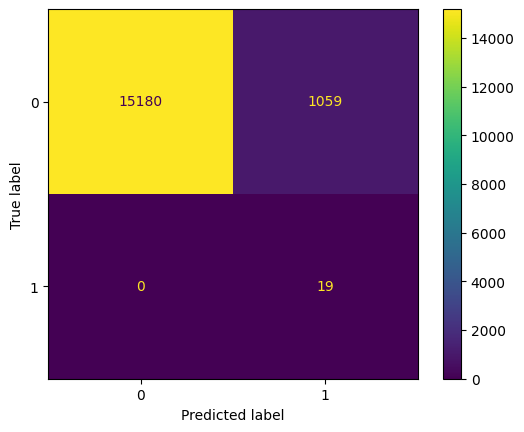

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=random_seed)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

plot_metrics(lr, y_pred)

Accuracy: 0.8972198302374216
Precision: 0.011242603550295858
Recall: 1.0
F1 Score: 0.022235225277940317


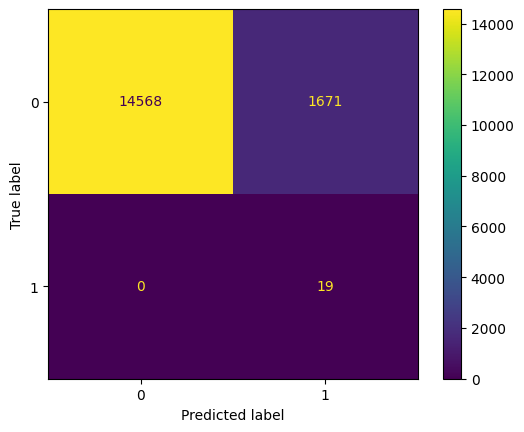

In [ ]:
params = {
    "C": np.linspace(0.1, 2, 10),
    "class_weight": [None, {0: 1.0, 1:1.4}]
}

# scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
metrics = ["recall", "accuracy"]
lr_grid = GridSearchCV(estimator=LogisticRegression(max_iter=500, random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")

lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_val)

plot_metrics(lr_grid, y_pred)

#### Decision Tree Classifier

Accuracy: 0.9992619018329438
Precision: 0.7333333333333333
Recall: 0.5789473684210527
F1 Score: 0.6470588235294118


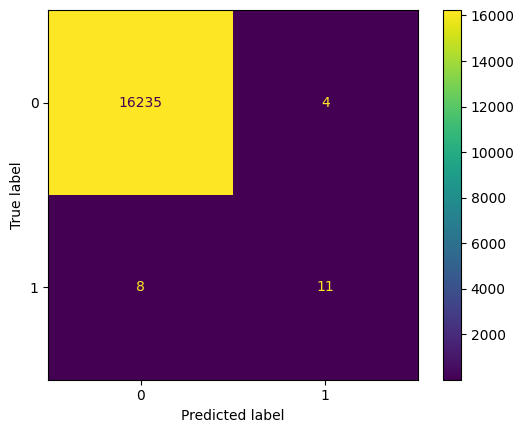

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_seed)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)

plot_metrics(dtc, y_pred)

Accuracy: 0.9883134456882765
Precision: 0.08292682926829269
Recall: 0.8947368421052632
F1 Score: 0.15178571428571427


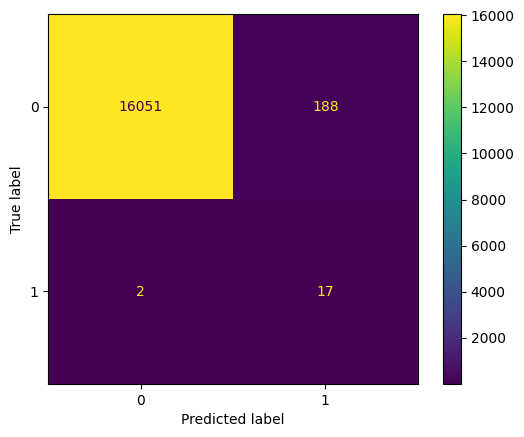

In [ ]:
params = {
    "max_depth": [5, 10],
    "min_samples_split": [10, 20],
    "min_samples_leaf": [5, 10],
    "max_leaf_nodes": [25, 50],
}

metrics = ["recall", "accuracy"]
dtc_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")

dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_val)

plot_metrics(dtc_grid, y_pred)

#### Random Forest

Accuracy: 1.0
Precision: 0.9
Recall: 0.47
F1 Score: 0.62


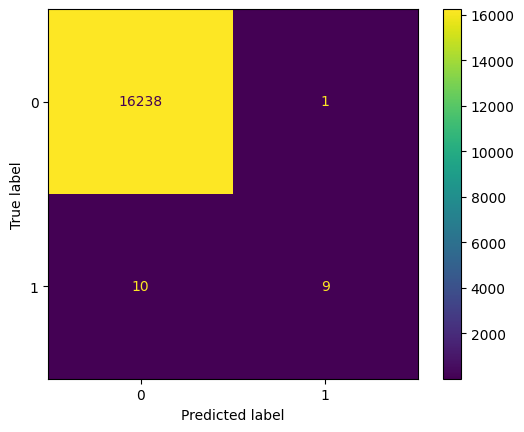

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

plot_metrics(rfc, y_pred)

In [ ]:
dtc_grid.best_params_ # from dtc_grid model

{'class_weight': None,
 'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'best'}

Accuracy: 1.0
Precision: 0.52
Recall: 0.79
F1 Score: 0.62


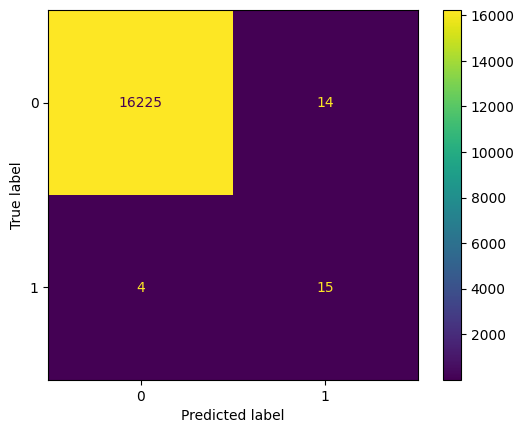

In [63]:
params = {
    "n_estimators": [x for x in range(80, 121, 10)],
    # The parameters below were taken from the dtc_grid best_params_
    'class_weight': [None],
    'max_depth': [10],
    'max_leaf_nodes': [50],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [5],
    'min_samples_split': [10],
}

metrics = ["recall", "accuracy"]
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed), param_grid=params, scoring=metrics, refit="recall")
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_val)

plot_metrics(rfc_grid, y_pred)

#### MLP Classifier

Trains a base model, but no grid search is performed.

Accuracy: 0.99
Precision: 0.13
Recall: 0.89
F1 Score: 0.23


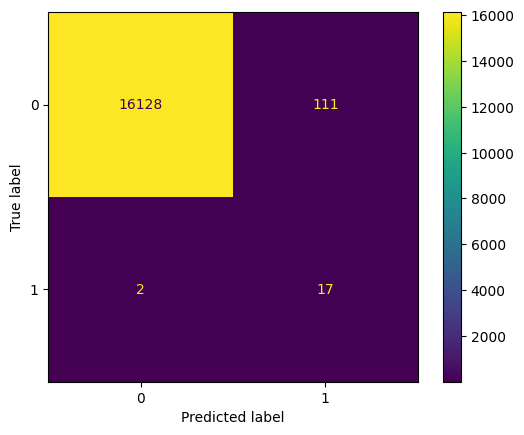

In [67]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=400)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_val)

plot_metrics(nn, y_pred)

### Predictions Based on Probabilities

In [ ]:
# Because recall is the metric we care most about, we are trying to maximize it 
def test_probability(model):
    scores = {}
    for i in range(0, 100, 1):
        i = round(i * 0.01, 2)
        y_pred = (model.predict_proba(X_val)[:, 1] >= i).astype(bool)
        accuracy = round(accuracy_score(y_val, y_pred), 2)
        precision = round(precision_score(y_val, y_pred), 2)
        recall = round(recall_score(y_val, y_pred), 2)
        # f1 = round(f1_score(y_val, y_pred), 2)
        scores[i] = [accuracy, precision, recall]

    best_score = recall_score(y_val, model.predict(X_val))
    best_thresh = 0 
    for item in scores:
        # scores[item][0] = accuracy
        # scores[item][1] = precision
        # scores[item][2] = recall
        if scores[item][0] > 0.95 and scores[item][1] > 0.1 and scores[item][2] > best_score: # 
            best_score = scores[item][2]
            best_thresh = item

    best_thresh = float(best_thresh) # convert to float

    if best_thresh > 0.0: # if an appropriate threshold above 0 was found
        print("Best Threshold:", best_thresh)
        print("=" * 30)
        
        y_pred = (model.predict_proba(X_val)[:, 1] >= best_thresh).astype(bool)
        plot_metrics(model, y_pred)
    else:  # if no appropriate thresholds above 0 were found
        print("No suitable thresholds found")
        print("Best Model:")
        print("=" * 30)

        y_pred = model.predict(X_val)
        plot_metrics(model, y_pred)

#### Logistic Regression

The logistic regression model had a perfect recall above had a perfect recall score, meaning that it caught every single instance of fraud in the validation set. However, its precision score was very low, meaning that it's predictions contained a high number of false positives. While catching all instance of fraud is good, the high number of false positives would create a bad experience for the customer, as approximately 1 in every 15 transactions would be flagged as fraud. 

Using the `test_probability` function created above, an attempt to find a lower probability threshold can be made in order to decrease the number of false positives: 

No suitable thresholds found
Best Model:
Accuracy: 0.93
Precision: 0.02
Recall: 1.0
F1 Score: 0.03


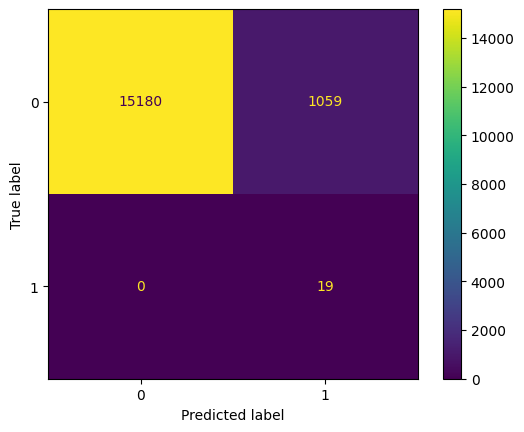

In [82]:
test_probability(lr)

No suitable thresholds were found, meaning that every threshold tested had a accuracy less than 95% and/or a precision less than 10%. Below, the logistic regression model that was ran through a grid search is also tested for a optimum threshold:

No suitable thresholds found
Best Model:
Accuracy: 0.9
Precision: 0.01
Recall: 1.0
F1 Score: 0.02


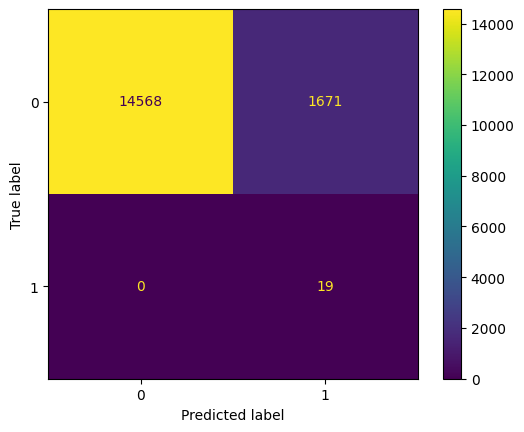

In [83]:
test_probability(lr_grid)

Once again, no suitable threshold above 0 could be found to create a adequate model. While the grid search model maintained the perfect recall score, it misclassified over 600 more negative instances than the standard logistic regression model. In the end, the base model is a better performer than the hyper-tuned model (on the validation set). 

#### Decision Tree

Best Threshold: 0.01
Accuracy: 1.0
Precision: 0.73
Recall: 0.58
F1 Score: 0.65


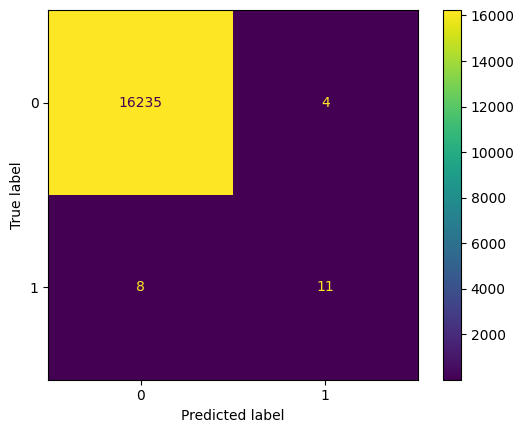

In [84]:
test_probability(dtc)

No suitable thresholds found
Best Model:
Accuracy: 0.99
Precision: 0.08
Recall: 0.89
F1 Score: 0.15


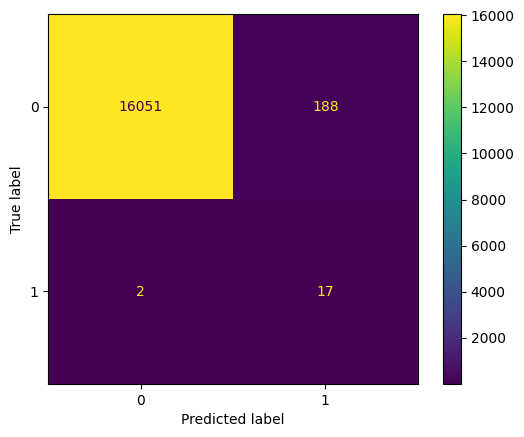

In [85]:
test_probability(dtc_grid)

#### Random Forest

Best Threshold: 0.02
Accuracy: 0.99
Precision: 0.13
Recall: 1.0
F1 Score: 0.24


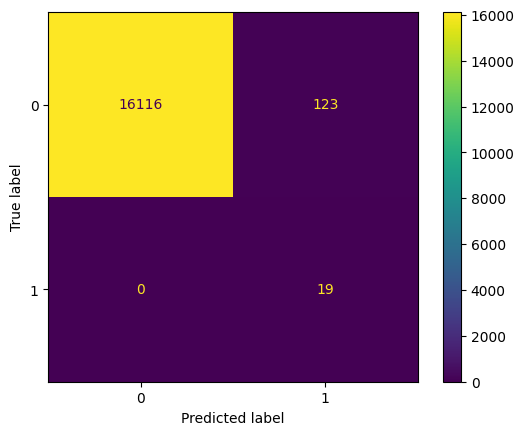

In [86]:
test_probability(rfc)

Best Threshold: 0.21
Accuracy: 0.99
Precision: 0.11
Recall: 0.95
F1 Score: 0.19


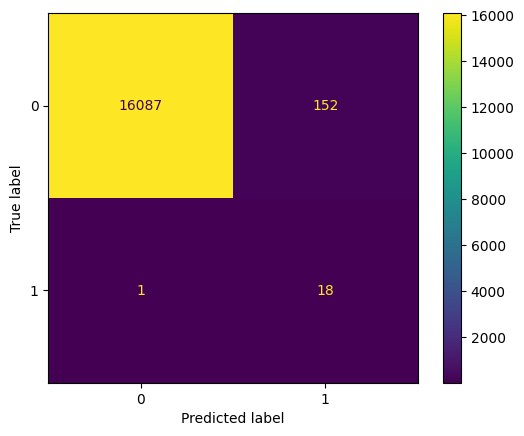

In [87]:
test_probability(rfc_grid)

No suitable thresholds found
Best Model:
Accuracy: 0.99
Precision: 0.13
Recall: 0.89
F1 Score: 0.23


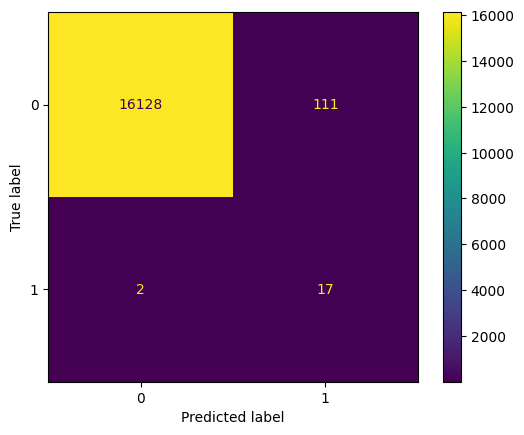

In [88]:
test_probability(nn)